In [11]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Function to simulate the two-state gene expression model (Telegraph model)
# Parameters:
# alpha: transcription rate
# beta: activation rate
# theta: deactivation rate
# d: mRNA degradation rate
# T: total simulation time
# dt: time step
# Returns: time points and mRNA count sequence
def simulate_telegraph_model(alpha, beta, theta, d, T, dt=0.1):
    time_points = np.arange(0, T, dt)
    mRNA_counts = np.zeros_like(time_points)
    promoter_active = False  # Initial state: inactive promoter
    mRNA = 0
    # Simulate the system using a simple Euler method (discrete time steps)
    for i, t in enumerate(time_points):
        # State transitions: activation or deactivation
        if promoter_active:
            if np.random.rand() < theta * dt:  # Possible deactivation
                promoter_active = False
        else:
            if np.random.rand() < beta * dt:  # Possible activation
                promoter_active = True

        # Transcription occurs only when the promoter is active
        if promoter_active and np.random.rand() < alpha * dt:
            mRNA += 1

        # mRNA degradation
        if mRNA > 0:
            degraded = np.sum(np.random.rand(mRNA) < d * dt)
            mRNA = max(mRNA - degraded, 0)

        mRNA_counts[i] = mRNA

    return time_points, mRNA_counts

In [3]:
# Function to simulate transcription-coupled repair (TCR) dynamics
# Parameters:
# Pd: damage detection probability
# Pr: restart probability after repair
# Pv: proportion of detectable damage
# m: mutation impact multiplier
# gene_length: length of the gene
# damage_positions: list of damage locations within the gene
# Returns: mutation profile along the gene
def simulate_TCR_dynamics(Pd, Pr, Pv, m, gene_length, damage_positions):
    mutation_profile = np.zeros(gene_length)
    for pos in range(gene_length):
        if pos in damage_positions and np.random.rand() < Pv:
            if np.random.rand() < Pd:  # Damage detected
                if np.random.rand() < Pr:  # Polymerase restarts
                    mutation_profile[pos] += m * 1  # Mutation impact
                else:
                    break  # Polymerase terminates
            else:
                mutation_profile[pos] += 0.5 * 1  # Undetected damage
        else:
            mutation_profile[pos] += 0  # Normal transcription, minimal mutation
    return mutation_profile

In [15]:
# Combined simulation: gene expression and TCR-induced mutations
# Returns: time points, mRNA counts, damage positions, average mutation profile
def combined_simulation(alpha, beta, theta, d, T, Pd, Pr, Pv, m, gene_length, num_damage, dt=0.1):
    # Step 1: Simulate mRNA production via the telegraph model
    time_points, mRNA_counts = simulate_telegraph_model(alpha, beta, theta, d, T, dt)

    # Step 2: Randomly assign damage positions along the gene
    damage_positions = np.random.choice(range(gene_length), size=num_damage, replace=False)

    # Step 3: Simulate TCR process for each mRNA event
    total_events = int(np.sum(mRNA_counts))
    cumulative_mutation_profile = np.zeros(gene_length)
    for _ in range(total_events):
        event_profile = simulate_TCR_dynamics(Pd, Pr, Pv, m, gene_length, damage_positions)
        cumulative_mutation_profile += event_profile

    # Step 4: Average mutation profile over all transcription events
    if total_events > 0:
        avg_mutation_profile = cumulative_mutation_profile / total_events
    else:
        avg_mutation_profile = cumulative_mutation_profile

    return time_points, mRNA_counts, damage_positions, avg_mutation_profile

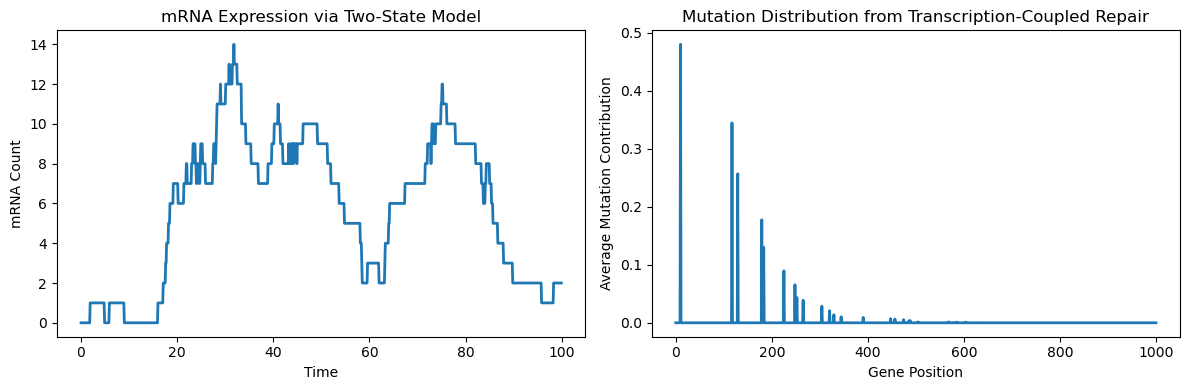

In [17]:
# Example parameters (adjustable based on specific biological questions)
alpha = 1.0     # Transcription rate
beta = 0.5      # Activation rate
theta = 0.5     # Deactivation rate
d = 0.1         # mRNA degradation rate
T = 100         # Total simulation time

Pd = 0.8        # Damage detection probability
Pr = 0.5        # Restart probability after repair
Pv = 0.7        # Detectable damage proportion
m = 1.5         # Mutation impact multiplier
gene_length = 1000   # Length of the gene
num_damage = 50      # Number of random damage positions in the gene

# Run the combined simulation
time_points, mRNA_counts, damage_positions, avg_mutation_profile = combined_simulation(
    alpha, beta, theta, d, T, Pd, Pr, Pv, m, gene_length, num_damage, dt=0.1
)

# Visualization of the results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(time_points, mRNA_counts, lw=2)
plt.xlabel("Time")
plt.ylabel("mRNA Count")
plt.title("mRNA Expression via Two-State Model")

plt.subplot(1, 2, 2)
plt.plot(range(gene_length), avg_mutation_profile, lw=2)
plt.xlabel("Gene Position")
plt.ylabel("Average Mutation Contribution")
plt.title("Mutation Distribution from Transcription-Coupled Repair")

plt.tight_layout()
plt.show()